# Mammogram Project

## 1. Data

We will be using data exploring mammogram mass. Thes data come from a paper published by Elter, et al <br>(source: http://archive.ics.uci.edu/ml/datasets/mammographic+mass). 

This dataset contain 961 instances of masses detected in mammograms and 6 attributes as following:

* `BI-RADS` - 1 to 5 (ordinal)  
* `age` - patient's age in years (integer)
* `shape` - mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
* `margin` - mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
* `density` - mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
* `severity` - benign=0 or malignant=1 (binominal)
 
The feature of `BI-RADS` is an assessment of how confident the severity classification is. 

For this project, we are tasked with developing a classification model for assessed the severity of mammogram mass. Since the feature of `BI-RADS` is relative with severity, we will consider to use `age`, `shape`, `margin` and `density` to build model. We will try some models as following,

## 2. Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(COLORS_PALETTE))
import tensorflow as tf
import time
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

In [2]:
COLUMN_NAME = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity']

masses_data = pd.read_csv('mammographic_masses.data.txt', 
                         na_values=['?'], names=COLUMN_NAME)
masses_data.head()

BI-RADS   age  shape  margin  density  severity
0      5.0  67.0    3.0     5.0      3.0         1
1      4.0  43.0    1.0     1.0      NaN         1
2      5.0  58.0    4.0     5.0      3.0         1
3      4.0  28.0    1.0     1.0      3.0         0
4      5.0  74.0    1.0     5.0      NaN         1

In [3]:
masses_data.describe()

BI-RADS         age       shape      margin     density    severity
count  959.000000  956.000000  930.000000  913.000000  885.000000  961.000000
mean     4.348279   55.487448    2.721505    2.796276    2.910734    0.463059
std      1.783031   14.480131    1.242792    1.566546    0.380444    0.498893
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   45.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

### 2.1 Missing Values

We can see there are some missing vaules in the data set. Before we drop those missing values, we should take a look. If there are too many missing values or have bias but we just drop them, it will influence the result.

In [4]:
missing_data = masses_data.loc[(masses_data['BI-RADS'].isnull()| 
                                masses_data['age'].isnull()| 
                                masses_data['shape'].isnull()| 
                                masses_data['margin'].isnull()| 
                                masses_data['density'].isnull())]
missing_data

BI-RADS   age  shape  margin  density  severity
1        4.0  43.0    1.0     1.0      NaN         1
4        5.0  74.0    1.0     5.0      NaN         1
5        4.0  65.0    1.0     NaN      3.0         0
6        4.0  70.0    NaN     NaN      3.0         0
7        5.0  42.0    1.0     NaN      3.0         0
9        5.0  60.0    NaN     5.0      1.0         1
12       4.0  64.0    1.0     NaN      3.0         0
19       4.0  40.0    1.0     NaN      NaN         0
20       NaN  66.0    NaN     NaN      1.0         1
22       4.0  43.0    1.0     NaN      NaN         0
26       2.0  66.0    1.0     1.0      NaN         0
27       5.0  63.0    3.0     NaN      3.0         0
35       4.0  77.0    3.0     NaN      NaN         0
38       4.0  48.0    4.0     5.0      NaN         1
40       4.0  59.0    2.0     1.0      NaN         0
43       4.0  61.0    2.0     1.0      NaN         0
45       5.0  44.0    2.0     4.0      NaN         1
47       4.0  23.0    1.0     1.0      NaN         0
48       2.0  42.0    NaN     NaN      4.0         0
52       4.0  23.0    1.0     1.0      NaN         0
53       4.0  63.0    2.0     1.0      NaN         0
54       4.0  53.0    NaN     5.0      3.0         1
55       4.0  43.0    3.0     4.0      NaN         0
57       5.0  51.0    2.0     4.0      NaN         0
58       4.0  45.0    2.0     1.0      NaN         0
59       5.0  59.0    2.0     NaN      NaN         1
63       3.0  57.0    2.0     1.0      NaN         0
65       4.0  25.0    2.0     1.0      NaN         0
67       5.0  72.0    4.0     3.0      NaN         1
74       5.0  70.0    NaN     4.0      NaN         1
..       ...   ...    ...     ...      ...       ...
496      4.0  82.0    NaN     5.0      3.0         1
501      5.0  59.0    4.0     4.0      NaN         1
519      3.0  68.0    NaN     NaN      3.0         0
520      4.0  62.0    4.0     NaN      3.0         1
521      5.0  65.0    1.0     NaN      3.0         1
531      4.0  55.0    NaN     NaN      3.0         0
537      5.0  63.0    NaN     4.0      3.0         1
541      4.0  49.0    2.0     NaN      3.0         0
554      5.0  70.0    NaN     5.0      3.0         1
561      2.0  59.0    NaN     4.0      3.0         0
569      4.0  64.0    3.0     4.0      NaN         1
574      4.0  60.0    3.0     NaN      NaN         0
581      2.0  65.0    NaN     1.0      2.0         0
614      3.0  46.0    NaN     5.0      NaN         1
627      4.0  57.0    2.0     1.0      NaN         0
660      4.0  58.0    NaN     4.0      3.0         1
661      4.0  51.0    NaN     4.0      3.0         0
662      3.0  50.0    NaN     NaN      3.0         1
665      4.0  27.0    2.0     1.0      NaN         0
677      4.0  57.0    4.0     4.0      NaN         1
683      5.0   NaN    3.0     3.0      3.0         1
691      4.0  72.0    3.0     NaN      3.0         0
723      4.0  60.0    3.0     NaN      4.0         0
745      6.0  76.0    3.0     NaN      3.0         0
752      5.0  48.0    NaN     4.0      NaN         1
778      4.0  60.0    NaN     4.0      3.0         0
819      4.0  35.0    3.0     NaN      2.0         0
824      6.0  40.0    NaN     3.0      4.0         1
884      5.0   NaN    4.0     4.0      3.0         1
923      5.0   NaN    4.0     3.0      3.0         1

[131 rows x 6 columns]

In [5]:
missing_values_count = masses_data.isnull().sum()
missing_values_count

BI-RADS      2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

It seems that missing values is randomly distributed. Therefore, we will drop thosw rows.

In [6]:
masses_data.dropna(inplace=True)
masses_data.describe()

BI-RADS         age       shape      margin     density    severity
count  830.000000  830.000000  830.000000  830.000000  830.000000  830.000000
mean     4.393976   55.781928    2.781928    2.813253    2.915663    0.485542
std      1.888371   14.671782    1.242361    1.567175    0.350936    0.500092
min      0.000000   18.000000    1.000000    1.000000    1.000000    0.000000
25%      4.000000   46.000000    2.000000    1.000000    3.000000    0.000000
50%      4.000000   57.000000    3.000000    3.000000    3.000000    0.000000
75%      5.000000   66.000000    4.000000    4.000000    3.000000    1.000000
max     55.000000   96.000000    4.000000    5.000000    4.000000    1.000000

### 2.2 Outlier

We can see the maximum vaule of BI-RADS is 55 but based on the information from American Breast Society the maximum BI-RADS is 6 <br> (source:https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/mammograms/understanding-your-mammogram-report.html). <br>Therefore, we consider this data is a typo.

In [7]:
masses_data.loc[masses_data['BI-RADS']==55]

BI-RADS   age  shape  margin  density  severity
340     55.0  46.0    4.0     3.0      3.0         1

In [8]:
masses_data = masses_data.drop(labels=340, axis=0)

We can confirm the true value of BI-RADS in this dataset. So, we delete this row.

### 2.3 Features

Distribution of the Severity in the dataset
0    0.515078
1    0.484922
Name: severity, dtype: float64


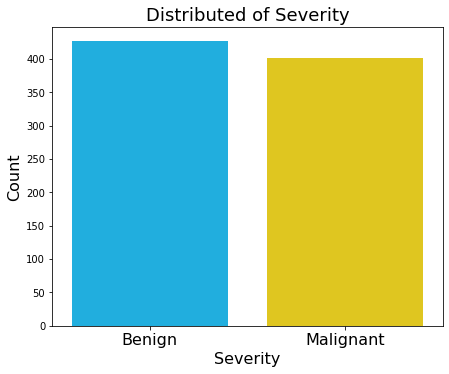

In [9]:
print('Distribution of the Severity in the dataset')
print(masses_data['severity'].value_counts()/len(masses_data))

plt.figure(figsize=(7,5.5))
res = sns.countplot('severity', data=masses_data)
plt.title('Distributed of Severity', fontsize=18)
plt.xlabel('Severity', fontsize=16)
plt.ylabel('Count', fontsize=16)
res.set_xticklabels(('Benign', 'Malignant'), fontsize = 16)
plt.show()

The percentage of patients who have benign mass is 51.5% and malignant mass is having 48.5%. The distribution of severity is not imbalance.

In [10]:
pd.crosstab(masses_data['severity'], masses_data['BI-RADS'])

BI-RADS   0.0  2.0  3.0  4.0  5.0  6.0
severity                              
0           2    7   20  365   31    2
1           3    0    4  103  285    7

From the above table, it seems that if a patient's BIRADS is over 5, they have a high possibility to be consider having malignant mass. Since BI-RADS is an assessment which is used to measure breast density ([American Breast Society](https://duckduckgo.com)).

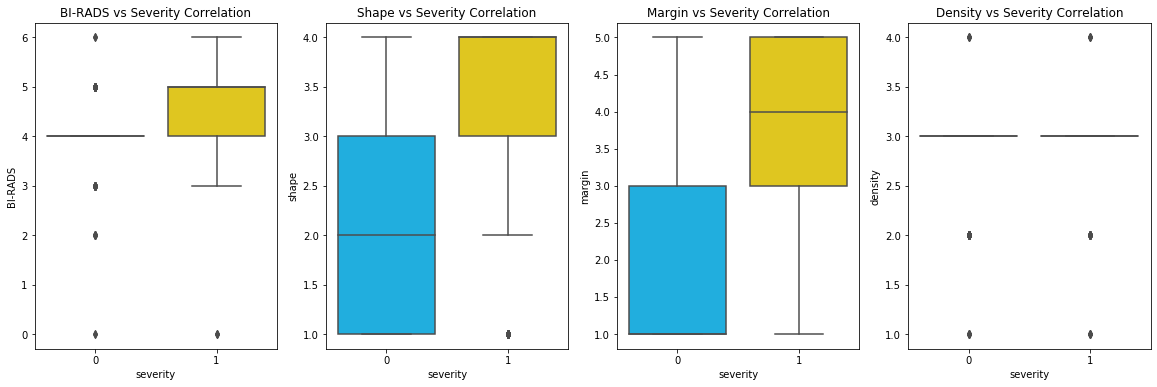

In [11]:
f, axes = plt.subplots(ncols=4, figsize=(20,6))

sns.boxplot(x='severity', y='BI-RADS', data=masses_data, ax=axes[0])
axes[0].set_title('BI-RADS vs Severity Correlation')

sns.boxplot(x='severity', y='shape', data=masses_data, ax=axes[1])
axes[1].set_title('Shape vs Severity Correlation')

sns.boxplot(x='severity', y='margin', data=masses_data, ax=axes[2])
axes[2].set_title('Margin vs Severity Correlation')

sns.boxplot(x='severity', y='density', data=masses_data, ax=axes[3])
axes[3].set_title('Density vs Severity Correlation')

plt.show()

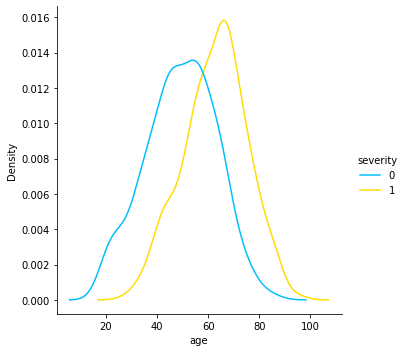

In [12]:
sns.displot(data=masses_data, x="age", hue="severity", kind="kde")

In [13]:
correlation = masses_data.corr()['severity'][:-1]
print("There correlated values with severity:\n{}".format(correlation.sort_values(ascending=False)))

There correlated values with severity:
margin     0.574722
shape      0.564233
BI-RADS    0.523483
age        0.456458
density    0.068398
Name: severity, dtype: float64


We can see that those features don't have significant  relationship with seversity.

## 3. Pre-processing data

At first, we normalized data and split into training and testing data sets. Then, we can ustilize those pre-processed data to build model.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

FEATURE = ['age', 'shape', 'margin', 'density']

X = masses_data.drop(['BI-RADS', 'severity'] , axis=1)
y = masses_data.severity

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

(X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, test_size=0.2, random_state=23)

In [15]:
 severity_names = ['benign', 'malignant']

## 4. Build Model

### 4.1 Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=1)
model_clf = clf.fit(X_train, y_train)

In [17]:
# Plot Decision Tree
from sklearn import tree
fig = plt.figure(figsize=(200,150))
_ = tree.plot_tree(model_clf, 
                   feature_names=FEATURE,  
                   class_names=severity_names,
                   filled=True)

In [18]:
# Plot Decision Tree
# from sklearn import tree
# import graphviz
# DOT data
# dot_data = tree.export_graphviz(model_clf, out_file=None, 
#                                 feature_names=FEATURE, 
#                                 class_names=severity_names,
#                                 filled=True)

# Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

In [19]:
model_clf.score(X_test, y_test)

0.7590361445783133

The accuarcy of testing dataset is 75.9% when we use the training dataset to build decision tree model. In order to prevent from overfitting, we can use cross validation to measure the accuracy.

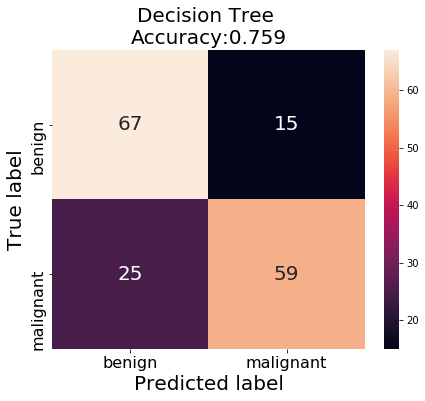

              precision    recall  f1-score   support

           0       0.73      0.82      0.77        82
           1       0.80      0.70      0.75        84

    accuracy                           0.76       166
   macro avg       0.76      0.76      0.76       166
weighted avg       0.76      0.76      0.76       166



In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

y_pred = model_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'malignant'], 
                     columns = ['benign', 'malignant'])

plt.figure(figsize=(7,5.5))
res = sns.heatmap(cm_df, annot=True, annot_kws={"size": 20})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

print(classification_report(y_test, y_pred))

We can see other metrics from confusion matrix. It shows that the model for training and test datasets the recall is 70% and precision is 80%.

In [21]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier(random_state=1)
cv_score_clf = cross_validate(clf, X, y, cv=10)

cv_score_clf['test_score'].mean()

0.7405965324713488

The accuarcy of testing dataset is 74.1% when we build decision tree model on this data set. 

### 4.2 SVM

In [22]:
from sklearn import svm

svc_linear = svm.SVC(kernel='linear', C=1)
model_svc_linear = svc_linear.fit(X_train, y_train)

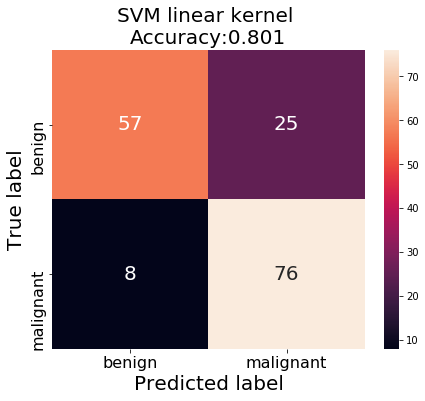

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        82
           1       0.75      0.90      0.82        84

    accuracy                           0.80       166
   macro avg       0.81      0.80      0.80       166
weighted avg       0.81      0.80      0.80       166



In [23]:
y_pred = model_svc_linear.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'malignant'], 
                     columns = ['benign', 'malignant'])

plt.figure(figsize=(7,5.5))
res = sns.heatmap(cm_df, annot=True, annot_kws={"size": 20})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.title('SVM linear kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

print(classification_report(y_test, y_pred))

We can see other metrics from confusion matrix. It shows that the model for training and test datasets the recall is 90% and precision is 75%.

In [24]:
svc_linear = svm.SVC(kernel='linear', C=1)

cv_score_svm_linear = cross_validate(svc_linear, X, y, cv=10)

cv_score_svm_linear['test_score'].mean()

0.7972818101674994

The accuarcy of testing dataset is 79.7% when we build SVM model on this data set.

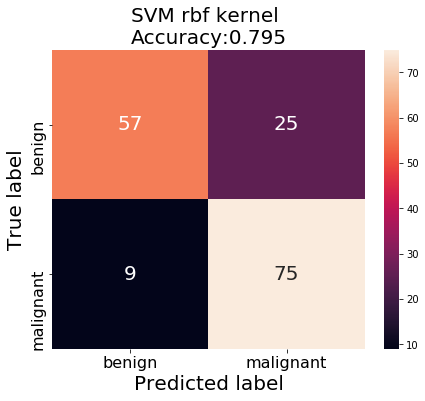

              precision    recall  f1-score   support

           0       0.86      0.70      0.77        82
           1       0.75      0.89      0.82        84

    accuracy                           0.80       166
   macro avg       0.81      0.79      0.79       166
weighted avg       0.81      0.80      0.79       166



In [25]:
svc_rbf = svm.SVC(kernel='rbf', C=1)
model_svc_rbf = svc_rbf.fit(X_train, y_train)

y_pred = model_svc_rbf.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'malignant'], 
                     columns = ['benign', 'malignant'])

plt.figure(figsize=(7,5.5))
res = sns.heatmap(cm_df, annot=True, annot_kws={"size": 20})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.title('SVM rbf kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

print(classification_report(y_test, y_pred))

We can see other metrics from confusion matrix. It shows that the model for training and test datasets the recall is 89% and precision is 75%.

In [26]:
svc_rbf = svm.SVC(kernel='rbf', C=1)

cv_score_svm_rbf = cross_validate(svc_rbf, X, y, cv=10)

cv_score_svm_rbf['test_score'].mean()

0.7744343226564796

The accuarcy of testing dataset is 77.4% when we build SVM model with rbf kernel on this data set.

### 4.3 KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
K = range(1, 50)

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

Text(0, 0.5, 'Error Rate')

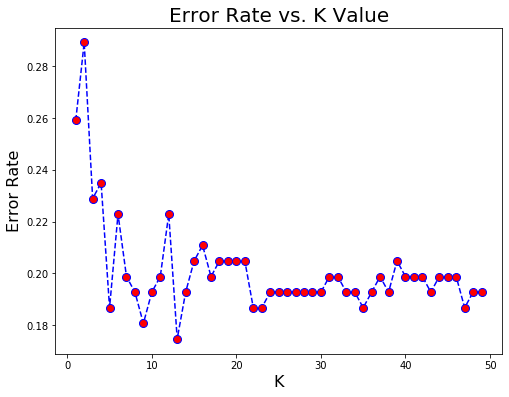

In [28]:
plt.figure(figsize=(8,6))
plt.plot(K,error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=16)
plt.ylabel('Error Rate', fontsize=16)

Here we can see that that after around K>10 the error rate just tends to hover around 0.23-0.20. Thus, we choose K = 10.

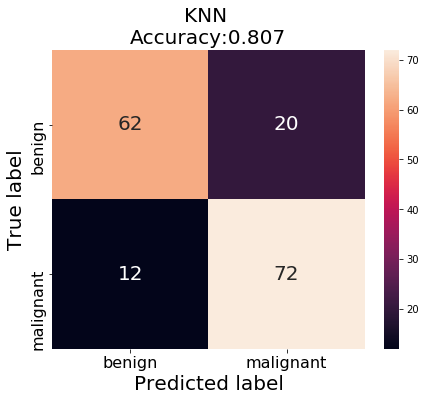

              precision    recall  f1-score   support

           0       0.84      0.76      0.79        82
           1       0.78      0.86      0.82        84

    accuracy                           0.81       166
   macro avg       0.81      0.81      0.81       166
weighted avg       0.81      0.81      0.81       166



In [29]:
knn = KNeighborsClassifier(n_neighbors=10)

model_knn = knn.fit(X_train, y_train)

y_pred = model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'malignant'], 
                     columns = ['benign', 'malignant'])

plt.figure(figsize=(7,5.5))
res = sns.heatmap(cm_df, annot=True, annot_kws={"size": 20})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

print(classification_report(y_test, y_pred))

We can see other metrics from confusion matrix. It shows that the model for training and test datasets the recall is 86% and precision is 78%.

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)

cv_score_knn = cross_validate(knn, X, y, cv=10)

cv_score_knn['test_score'].mean()

0.7804437261240083

The accuarcy of testing dataset is 78% when we build KNN model on this data set.

### 4.4 Logistic Regression

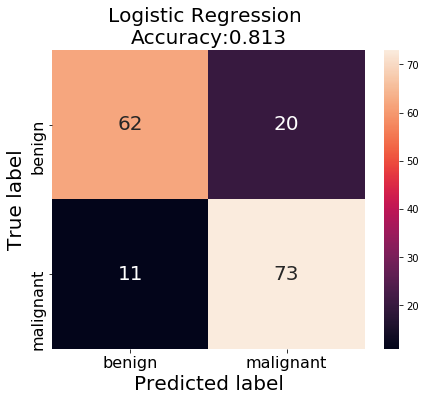

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        82
           1       0.78      0.87      0.82        84

    accuracy                           0.81       166
   macro avg       0.82      0.81      0.81       166
weighted avg       0.82      0.81      0.81       166



In [31]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

model_log = log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['benign', 'malignant'], 
                     columns = ['benign', 'malignant'])

plt.figure(figsize=(7,5.5))
res = sns.heatmap(cm_df, annot=True, annot_kws={"size": 20})
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 16)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 16)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)), fontsize=20)
plt.ylabel('True label', fontsize=20)
plt.xlabel('Predicted label', fontsize=20)
plt.show()

print(classification_report(y_test, y_pred))

We can see other metrics from confusion matrix. It shows that the model for training and test datasets the recall is 87% and precision is 78%.

In [32]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
cv_score_log = cross_validate(log, X, y, cv=10)
cv_score_log['test_score'].mean()

0.8069791360564208

The accuarcy of testing dataset is 80.7% when we build logistic regression model on this data set.

### 4.5 Deep Learning

In [33]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

def create_model(unit, optimizer, dropout_rate):
    model = Sequential()
    model.add(Dense(unit, input_dim=4, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [34]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=create_model, epochs= 100, batch_size=64, verbose=0)

In [36]:
from sklearn.model_selection import GridSearchCV

params={#'unit':[8, 6, 4],
        'unit':[6, 4],
        #'optimizer': ['SGD', 'RMSprop', 'Adam'],
        'optimizer': ['RMSprop', 'Adam'],
        #'dropout_rate': [0.0, 0.4, 0.6, 0.8],
        'dropout_rate': [0.4, 0.6],
        }

gs = GridSearchCV(estimator=model, param_grid=params, cv=10)
# now fit the dataset to the GridSearchCV object. 
grid_result = gs.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.797326 using {'dropout_rate': 0.6, 'optimizer': 'Adam', 'unit': 4}


We use GridSearchCV to tune parameter and the result is {'dropout_rate': 0.6, 'optimizer': 'Adam', 'unit': 6}. Useing those parameters and cross validation the accuracy of deep learning model is 79.7%.

## 5. Summary

| Model                  | Accuracy   | 
|:----------------------:|:----------:|
| Decision Tree          | 74.1%      |
| SVM with linear kernel | 79.7%      |
| SVM with rbf kernel    | 77.4%      |
| KNN                    | 78.0%      |
| Logistic Regression    | 80.7%      |
| Keras in scikit-learn  | 79.7%      |

From the table, we can see that the accuracy of most algorithm is 77-81% but deciosn tree is the less one with 74.1%. If we consider hyperparameter or different topologies, the result may be different.